# PROJECT COMPANY ZUBER



## Introduccion 

Zuber, una startup de movilidad compartida que está ingresando al mercado de Chicago, requiere analizar los patrones de comportamiento y preferencias de sus usuarios potenciales, así como evaluar el impacto de factores externos en la demanda del servicio.

Para ello, se realizó una extracción estructurada de datos mediante consultas SQL optimizadas, seguida de procesos de limpieza y transformación (ETL) para garantizar la calidad de los datos. El análisis posterior permitió identificar tendencias clave y correlaciones significativas, generando insights basados en datos que respaldan la estrategia de penetración de mercado y la optimización de operaciones.

## Carga de datos 

De a cuerdo a los datos extraidos para el desarrollo del proyecto, exponemos el contenido y el nombre que adoptaran los archivos csv para el desarrollo de los dataframes y los analisis posteriores a estos:

`project_sql_result_01.csv`. Contiene los siguientes datos:

   -```company_name```: nombre de la empresa de taxis.

   -`trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

`project_sql_result_04.csv`. Contiene los siguientes datos:

   -`dropoff_location_name`: barrios de Chicago donde finalizaron los viajes.

   -`average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

`project_sql_result_07.csv`. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

   -`start_ts`: fecha y hora de recogida.

   -`weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje.

   -`duration_seconds`: duración del viaje en segundos.


In [796]:
# Cargar todas las librerías
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [797]:
# project_sql_result_01.csv acogera el nombre de company_and_trips

company_and_trips=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 8/moved_project_sql_result_01.csv', sep=',')

# project_sql_result_04.csv acogera el nombre de dropoff_location_avg 

dropoff_location_avg=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 8/moved_project_sql_result_04.csv', sep=',')

# project_sql_result_07.csv acogera el nombre de start_weather

start_weather=pd.read_csv('/Users/ASUS/OneDrive/Documentos/Tripleten/Proyecto Spring 8/moved_project_sql_result_07.csv', sep=',')

## Nombres asignados a los DataFrames

Para garantizar un desarrollo estructurado y eficiente del proyecto, se asignaron nombres descriptivos a los *DataFrames* generados a partir de las consultas SQL. Esta práctica permite mantener un flujo de trabajo organizado y facilita la interpretación de los resultados en las distintas etapas del análisis. Las asignaciones realizadas son las siguientes:

- `company_and_trips`: corresponde al resultado de la consulta `project_sql_result_01`.
- `dropoff_location_avg`: corresponde al resultado de la consulta `project_sql_result_04`.
- `start_weather`: corresponde al resultado de la consulta `project_sql_result_07`.

A continuación, se procederá con el análisis exploratorio de los datos.


In [798]:
# visualizacion preliminar de los dataframes

company_and_trips.info()
for col in company_and_trips.select_dtypes(include='object'):
    company_and_trips[col] = company_and_trips[col].str.lower()

sample_company_and_trips= company_and_trips.sample(n=5)

print()
print(sample_company_and_trips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

                            company_name  trips_amount
53              5006 - 39261 salifu bawa            14
60               2733 - 74600 benny jona             7
38               6743 - 78771 luhak corp            33
14  patriot taxi dba peace taxi associat          2235
54             2192 - 73487 zeymane corp            14


In [799]:
# visualizacion preliminar de los dataframes
dropoff_location_avg.info()

for col in dropoff_location_avg.select_dtypes(include='object'):
    dropoff_location_avg[col]=dropoff_location_avg[col].str.lower()
        
sample_dropoff_location_avg= dropoff_location_avg.sample(n=5)

print()
print(sample_dropoff_location_avg)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

   dropoff_location_name  average_trips
82         south deering       7.500000
42         garfield park      65.766667
15        garfield ridge     745.400000
88                 undef       3.800000
18             west town     516.400000


In [800]:
# visualizacion preliminar de los dataframes
start_weather.info()
for col in start_weather.select_dtypes(include='object'):
    start_weather[col]=start_weather[col].str.lower()

sample_start_weather= start_weather.sample(n=5)

print()
print(sample_start_weather)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

                start_ts weather_conditions  duration_seconds
378  2017-11-04 08:00:00               good            1686.0
935  2017-11-04 07:00:00               good            1538.0
337  2017-11-04 16:00:00                bad            2880.0
880  2017-11-11 10:00:00               good            1320.0
757  2017-11-11 11:00:00               good            1620.0


## Correcion de tipo de datos

- Dado que la naturaleza de los datos requiere un procesamiento adecuado, es fundamental contar con una estructura organizada y coherente. Por esta razón, se ha llevado a cabo una reorganización estratégica de los conjuntos de datos, lo que permitirá facilitar su análisis en cada etapa del proyecto. A continuación, se detallan las asignaciones realizadas especificamente al dataframe `start_weather`:



In [801]:
# Cambio de tipo de datos para el Analisis 

start_weather['start_ts']=pd.to_datetime(start_weather['start_ts']) 

start_weather['duration_seconds']=start_weather['duration_seconds'].astype('int')

start_weather.info()

sample_start_weather= start_weather.sample(n=5)
print()
print(sample_start_weather)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB

               start_ts weather_conditions  duration_seconds
231 2017-11-04 07:00:00               good              1200
410 2017-11-04 16:00:00                bad              3420
904 2017-11-04 13:00:00               good              3180
612 2017-11-11 08:00:00               good              1320
9   2017-11-11 12:00:00               good              2040


## Principales barrios en términos de finalización

Análisis de Barrios y Público Objetivo:

Tras completar la etapa de preparación de datos, el siguiente paso consiste en identificar información relevante para el estudio. En este caso particular, se buscará determinar el top 10 de barrios con mayor actividad al finalizar un recorrido. Este análisis permitirá estimar el público objetivo y, al mismo tiempo, establecer posibles tendencias o alternativas de comportamiento de los usuarios.

  dropoff_location_name  average_trips
0                  loop   10727.466667
1           river north    9523.666667
2         streeterville    6664.666667
3             west loop    5163.666667
4                o'hare    2546.900000
5             lake view    2420.966667
6            grant park    2068.533333
7         museum campus    1510.000000
8            gold coast    1364.233333
9    sheffield & depaul    1259.766667


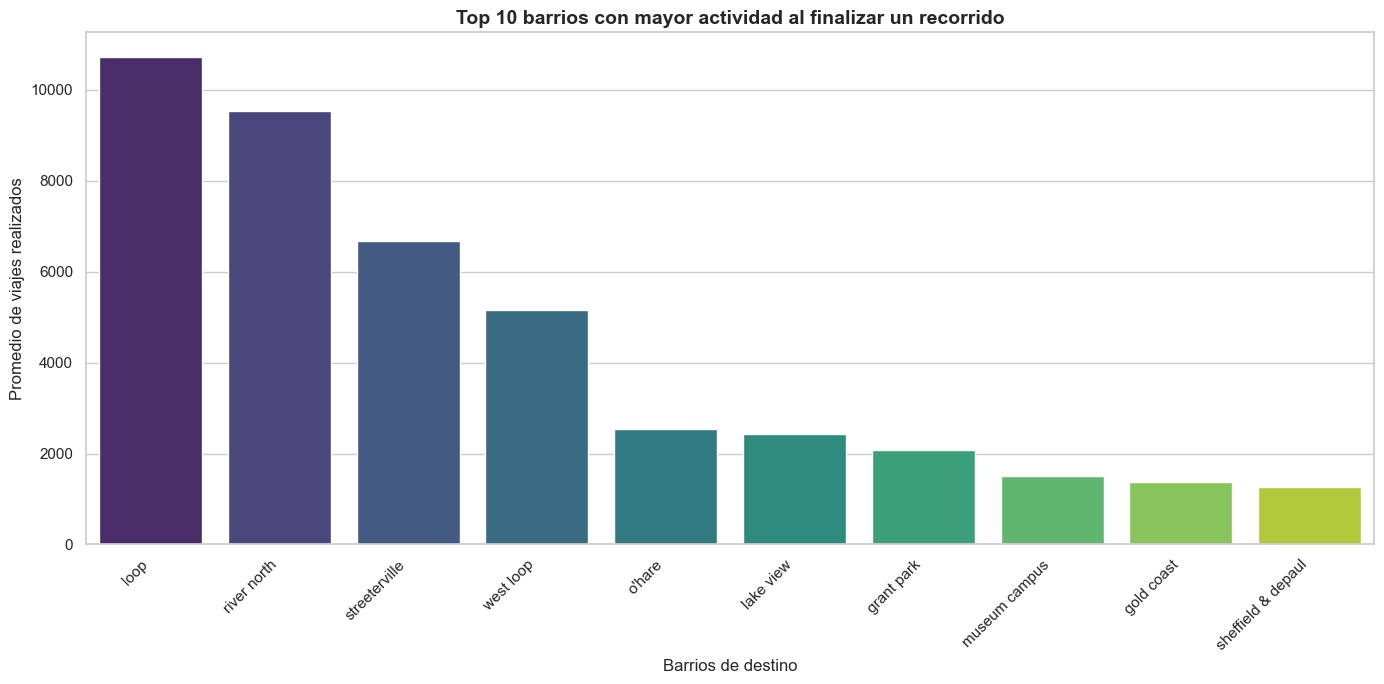

In [802]:
# Top 10 Principales barrios en terminos de finalizacion:

Top_10_dropoff_location=dropoff_location_avg.sort_values(by='average_trips',ascending=False).head(10)
print(Top_10_dropoff_location)

# Crear grafico
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))
sns.barplot(x='dropoff_location_name', y='average_trips',hue='dropoff_location_name', data=Top_10_dropoff_location, palette='viridis')
plt.xlabel('Barrios de destino', fontsize=12)
plt.ylabel('Promedio de viajes realizados', fontsize=12)
plt.title('Top 10 barrios con mayor actividad al finalizar un recorrido', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Empresas de Taxis Vs Numero de viajes 

Es importante destacar que la cantidad de viajes está directamente relacionada con el nivel de éxito y la confianza que los usuarios depositan en determinadas compañías de taxis. En este análisis, se resaltarán las principales empresas del sector y se examinará el comportamiento de cada una en comparación con las demás, con el objetivo de establecer conclusiones claras y fundamentadas sobre su desempeño y preferencia por parte del público.

De manera relevante seleccionaremos solo las empresas con almenos 3 cifras significativas en trayectos

                            company_name  trips_amount
0                              flash cab         19558
1              taxi affiliation services         11422
2                       medallion leasin         10367
3                             yellow cab          9888
4        taxi affiliation service yellow          9299
5              chicago carriage cab corp          9181
6                           city service          8448
7                               sun taxi          7701
8              star north management llc          7455
9      blue ribbon taxi association inc.          5953
10               choice taxi association          5015
11                            globe taxi          4383
12             dispatch taxi affiliation          3355
13             nova taxi affiliation llc          3175
14  patriot taxi dba peace taxi associat          2235
15              checker taxi affiliation          2216
16                          blue diamond          2070
17        

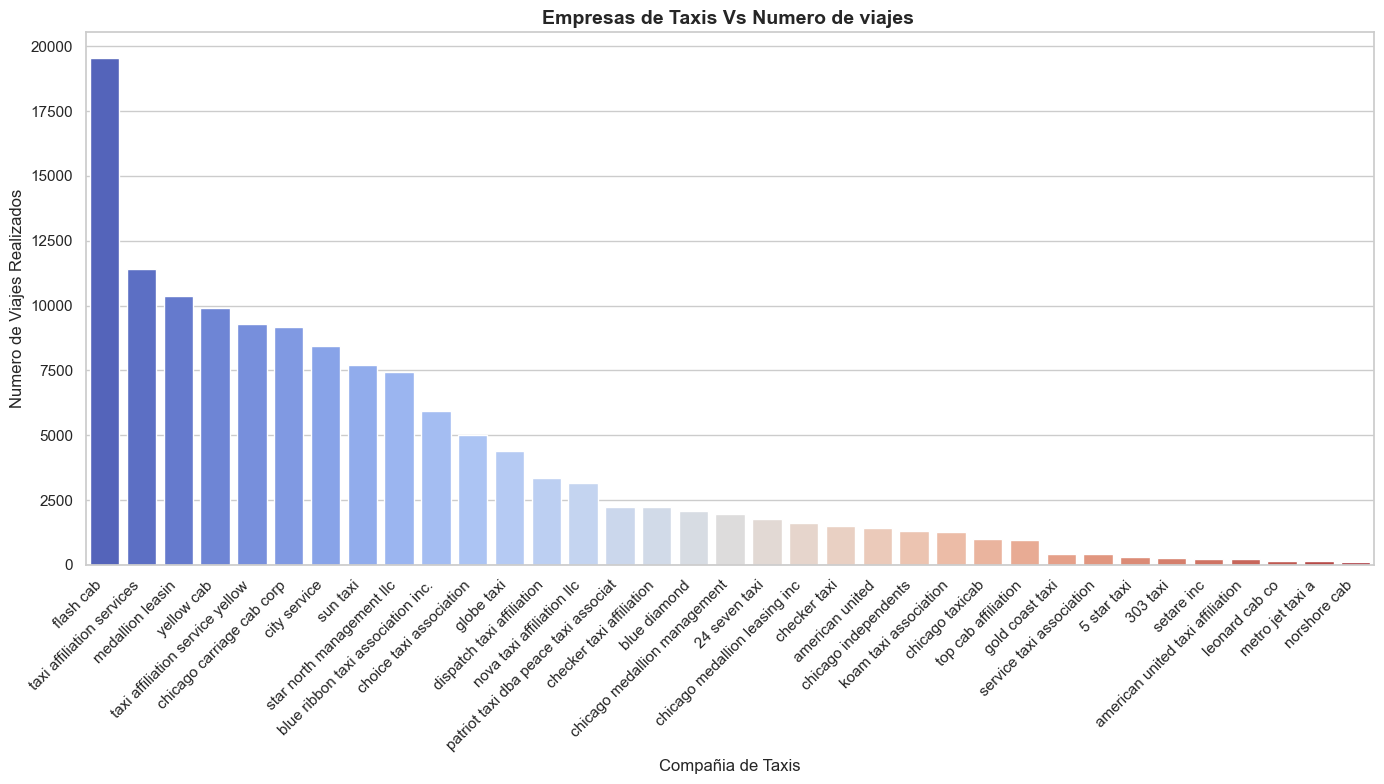

In [803]:
# Compañias de taxis frente al numero de viajes realizados:

company_and_trip =company_and_trips.sort_values(by='trips_amount',ascending=False)
company_and_trip_filtered = company_and_trip[company_and_trip['trips_amount'] > 100]
# Mostramos el resultado filtrado
print(company_and_trip_filtered)
# Crear grafico

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='company_name', y='trips_amount',hue='company_name', data=company_and_trip_filtered , palette='coolwarm')
plt.xlabel('Compañia de Taxis', fontsize=12)
plt.ylabel('Numero de Viajes Realizados', fontsize=12)
plt.title('Empresas de Taxis Vs Numero de viajes ', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
